In [2]:
!pip install pycaret
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 4.3 MB/s 
     |████████████████████████████████| 1.7 MB 36.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 30.1 MB/s 
     |████████████████████████████████| 2.0 MB 40.7 MB/s 
     |████████████████████████████████| 25.9 MB 84.6 MB/s 
     |████████████████████████████████| 262 kB 46.6 MB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 1.3 MB 54.2 MB/s 
     |████████████████████████████████| 88 kB 8.8 MB/s 
     |████████████████████████████████| 6.8 MB 21.3 MB/s 
     |████████████████████████████████| 125 kB 50.8 MB/s 
     |████████████████████████████████| 10.4 MB 29.4 MB/s 
     |████████████████████████████████|

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df_bonus = pd.read_csv('/content/drive/MyDrive/selectedfeatureset4.csv')

Mounted at /content/drive


In [2]:
df_bonus

,BomanInd,Cfreq,Charge,W,BLOSUM1,MW,Yfreq,Efreq,mswhim2,Mfreq,...,Ifreq,Kfreq,BLOSUM4,BLOSUM6,Ffreq,Gfreq,Tfreq,Vfreq,Sfreq,hemolytic
0,0.370909,0.000000,1.989,0,0.206364,1112.33,0.000000,0.090909,0.308182,0.000000,...,0.000000,0.181818,-2.490909e-01,0.223636,0.000000,0.090909,0.000000,0.181818,0.000000,0
1,5.146667,0.000000,4.990,4,0.203333,1728.92,0.000000,0.000000,0.403333,0.000000,...,0.000000,0.000000,-5.566667e-01,0.483333,0.000000,0.166667,0.000000,0.000000,0.000000,0
2,0.744483,0.206897,-0.933,1,0.047241,2916.35,0.000000,0.034483,0.357241,0.000000,...,0.000000,0.000000,6.551724e-02,-0.067241,0.000000,0.172414,0.172414,0.103448,0.034483,0
3,6.295000,0.000000,6.990,6,-0.285000,2071.40,0.000000,0.000000,0.625000,0.000000,...,0.000000,0.000000,-1.110000e+00,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,-0.172857,0.095238,4.680,0,-0.279048,2319.93,0.000000,0.000000,0.446190,0.000000,...,0.095238,0.142857,5.286776e-18,0.088095,0.095238,0.047619,0.047619,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3762,-0.018800,0.000000,1.989,1,-0.030400,2668.22,0.000000,0.040000,0.366000,0.120000,...,0.040000,0.120000,-1.300000e-01,0.369200,0.040000,0.120000,0.040000,0.080000,0.040000,1
3763,1.422632,0.000000,7.986,2,-0.034211,2417.01,0.000000,0.000000,0.484737,0.000000,...,0.052632,0.315789,-3.752632e-01,0.132632,0.105263,0.000000,0.000000,0.052632,0.052632,0
3764,0.293636,0.000000,3.031,1,-0.338182,1352.70,0.000000,0.000000,0.584545,0.090909,...,0.181818,0.090909,-1.109091e-01,0.280909,0.000000,0.090909,0.000000,0.000000,0.090909,1
3765,0.679091,0.000000,4.987,0,-0.059091,1296.70,0.000000,0.000000,0.537273,0.000000,...,0.000000,0.363636,-4.109091e-01,0.185455,0.000000,0.000000,0.090909,0.181818,0.000000,0


In [3]:
from pycaret.classification import *
exp_name = setup(data = df_bonus,target = 'hemolytic',preprocess='True')

,Description,Value
0,session_id,692
1,Target,hemolytic
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3767, 27)"
5,Missing Values,False
6,Numeric Features,23
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
best_model = compare_models(sort='recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8350,0.9024,0.8242,0.8245,0.8238,0.6686,0.6694,0.758
lightgbm,Light Gradient Boosting Machine,0.8293,0.8969,0.8177,0.8183,0.8175,0.6571,0.6578,0.212
gbc,Gradient Boosting Classifier,0.8012,0.8750,0.8046,0.7790,0.7911,0.6016,0.6025,1.062
et,Extra Trees Classifier,0.8221,0.8897,0.7942,0.8204,0.8066,0.6420,0.6428,0.610
ridge,Ridge Classifier,0.7515,0.0000,0.7844,0.7138,0.7470,0.5039,0.5067,0.017
lda,Linear Discriminant Analysis,0.7492,0.8204,0.7804,0.7122,0.7444,0.4993,0.5017,0.038
lr,Logistic Regression,0.7450,0.8171,0.7666,0.7119,0.7378,0.4904,0.4923,0.415
ada,Ada Boost Classifier,0.7595,0.8421,0.7504,0.7414,0.7450,0.5175,0.5186,0.272
dt,Decision Tree Classifier,0.7477,0.7497,0.7228,0.7352,0.7287,0.4930,0.4933,0.048
qda,Quadratic Discriminant Analysis,0.5186,0.5255,0.6369,0.4956,0.5455,0.0509,0.0525,0.027


In [5]:
best_model = compare_models(cross_validation=False, sort='recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.4881,0.5000,1.0000,0.4881,0.6560,0.0000,0.0000,0.07
gbc,Gradient Boosting Classifier,0.8028,0.8815,0.7917,0.8018,0.7967,0.6053,0.6054,1.28
et,Extra Trees Classifier,0.8302,0.8997,0.7844,0.8557,0.8185,0.6596,0.6618,0.86
lightgbm,Light Gradient Boosting Machine,0.8232,0.8992,0.7826,0.8438,0.8120,0.6455,0.6472,0.25
ridge,Ridge Classifier,0.7480,0.7485,0.7699,0.7290,0.7489,0.4964,0.4971,0.02
rf,Random Forest Classifier,0.8161,0.9080,0.7699,0.8399,0.8034,0.6313,0.6334,0.96
lda,Linear Discriminant Analysis,0.7498,0.8117,0.7699,0.7315,0.7502,0.4999,0.5005,0.04
lr,Logistic Regression,0.7569,0.8157,0.7681,0.7426,0.7551,0.5138,0.5141,0.47
ada,Ada Boost Classifier,0.7542,0.8413,0.7373,0.7537,0.7454,0.5079,0.5080,0.33
dt,Decision Tree Classifier,0.7401,0.7444,0.6957,0.7529,0.7232,0.4789,0.4802,0.06


In [10]:
tuned_gbc = tune_model(gbc, early_stopping=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8447,0.9138,0.8629,0.8168,0.8392,0.6893,0.6902
1,0.8333,0.8914,0.8306,0.8175,0.8240,0.6657,0.6658
2,0.8220,0.8997,0.8065,0.8130,0.8097,0.6425,0.6425
3,0.8371,0.9035,0.8387,0.8189,0.8287,0.6735,0.6737
4,0.8409,0.9180,0.7967,0.8522,0.8235,0.6790,0.6803
5,0.7803,0.8787,0.7317,0.7826,0.7563,0.5567,0.5578
6,0.8593,0.9190,0.8943,0.8209,0.8560,0.7190,0.7215
7,0.8213,0.8944,0.7805,0.8276,0.8033,0.6398,0.6408
8,0.8137,0.8783,0.8211,0.7891,0.8048,0.6267,0.6272


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 8
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=9,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0005,
                           min_impurity_split=None, min_samples_leaf=3,
                           min_samples_split=5, min_weight_fraction_leaf=0.0,
                           n_estimators=240, n_iter_no_change=None,
                           presort='deprecated', random_state=692,
                           subsample=0.95, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [7]:
lightgbm=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8485,0.9221,0.8468,0.8333,0.8400,0.6961,0.6962
1,0.8295,0.8952,0.8145,0.8211,0.8178,0.6577,0.6577
2,0.8295,0.8925,0.7903,0.8376,0.8133,0.6567,0.6577
3,0.8371,0.8968,0.8145,0.8347,0.8245,0.6726,0.6728
4,0.8561,0.9277,0.8293,0.8571,0.8430,0.7102,0.7105
5,0.8106,0.8802,0.7805,0.8067,0.7934,0.6187,0.6189
6,0.8289,0.9045,0.8699,0.7868,0.8263,0.6585,0.6618
7,0.8099,0.8865,0.7967,0.7967,0.7967,0.6182,0.6182
8,0.8289,0.8851,0.8455,0.8000,0.8221,0.6575,0.6585


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 5
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=692, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [8]:
et=create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8295,0.9046,0.8145,0.8211,0.8178,0.6577,0.6577
1,0.8220,0.8849,0.7823,0.8291,0.8050,0.6415,0.6424
2,0.8333,0.8916,0.7903,0.8448,0.8167,0.6642,0.6654
3,0.8182,0.8875,0.7984,0.8115,0.8049,0.6347,0.6348
4,0.8106,0.9002,0.7480,0.8288,0.7863,0.6171,0.6197
5,0.7992,0.8594,0.7724,0.7917,0.7819,0.5960,0.5961
6,0.8441,0.9090,0.8618,0.8154,0.8379,0.6880,0.6890
7,0.7985,0.8683,0.7398,0.8125,0.7745,0.5931,0.5952
8,0.8099,0.8988,0.8049,0.7920,0.7984,0.6186,0.6186


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 6
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=692, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [12]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8295,0.9149,0.8306,0.8110,0.8207,0.6583,0.6585
1,0.8409,0.9081,0.8387,0.8254,0.8320,0.6809,0.6810
2,0.8333,0.8928,0.7984,0.8390,0.8182,0.6645,0.6652
3,0.8258,0.8969,0.8065,0.8197,0.8130,0.6499,0.6500
4,0.8561,0.9142,0.8049,0.8761,0.8390,0.7093,0.7114
5,0.8295,0.9039,0.7886,0.8362,0.8117,0.6562,0.6572
6,0.8479,0.9106,0.8618,0.8217,0.8413,0.6954,0.6962
7,0.8403,0.8986,0.8211,0.8347,0.8279,0.6790,0.6790
8,0.8137,0.8909,0.8293,0.7846,0.8063,0.6271,0.6280


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=692, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=692, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

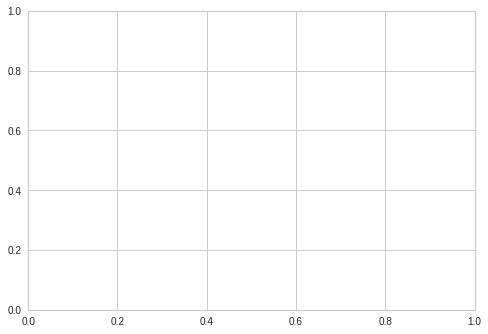

In [16]:
evaluate_model(rf)

In [17]:
evaluate_model(tuned_gbc)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=9,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0005,
                           min_impurity_split=None, min_samples_leaf=3,
                           min_samples_split=5, min_weight_fraction_leaf=0.0,
                           n_estimators=240, n_iter_no_change=None,
                           presort='deprecated', random_state=692,
                           subsample=0.95, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [18]:
evaluate_model(lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=692, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [19]:
evaluate_model(et)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=692, verbose=0,
                     warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…